***
# **Cas fictif** : India Amazon sales

***

Étapes : 
1. Analyse exploratoire des données
2. Data processing
3. Tester les hypothèses
4. Analyse statistique
5. Recommendations 
6. Itération et contrôle en continu
7. Reporting
***

In [2]:
import os

cwd = os.getcwd()

# Loop to create folders
folder_names = ['Dataframe', 'Output', 'Data']

folders = {}
for folder_name in folder_names:
    folders[folder_name] = os.path.join(cwd, folder_name)

    if not os.path.exists(os.path.join(cwd, folder_name)):
        os.makedirs(os.path.join(cwd, folder_name))
        print(f'Le dossier « {folder_name} » a été créé')

    else:
        print(f'Le dossier « {folder_name} » est existant')

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant


In [3]:
# Création des variables de path

# Déterminer si os est win ou linux pour définir les path
if os.name == 'nt':
    slash = '\\'
elif os.name == 'posix':
    slash = '/'

path_prog =     cwd + slash
path_data =     folders['Data'] + slash
path_df =       folders['Dataframe'] + slash
path_output =   folders['Output'] + slash

# Mettre \\ pour éviter les erreurs
path_dict = [path_prog, path_data, path_df, path_output]
for path in path_dict:
    path = path.replace('\\','\\\\')


# Détermination de l'année
print(path_prog)
print(path_data)
print(path_df)
print(path_output)

c:\Users\Charles_tour\Documents\GitHub\interview_practice\
c:\Users\Charles_tour\Documents\GitHub\interview_practice\Data\
c:\Users\Charles_tour\Documents\GitHub\interview_practice\Dataframe\
c:\Users\Charles_tour\Documents\GitHub\interview_practice\Output\


***
Objectif : Optimiser le prix
Trouver les liens entre les clients qui dépenses bcp
Trouver des variables clefs
Clustering : déterminer des catégorie sur lesquels cibler le marketing



Option deux : réduire le nombre de Status = Cancelled
***

In [4]:
# Source des données
# https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data

import pandas as pd

pd.set_option('display.max_columns', None)

sale_report = pd.read_csv(path_data + 'Amazon_Sale_Report.csv', index_col=0)
sale_report.head()

C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_11948\2799941029.py:8: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  sale_report = pd.read_csv(path_data + 'Amazon_Sale_Report.csv', index_col=0)


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


***
# 1. Data cleaning
***

In [35]:
# Cleaning column names
print(sale_report.columns.tolist())
sale_report.columns = sale_report.columns.str.rstrip().str.replace('-', '_').str.replace(' ', '_').str.lower()
print(sale_report.columns.tolist())

['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']
['order_id', 'date', 'status', 'fulfilment', 'sales_channel', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'qty', 'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids', 'b2b', 'fulfilled_by', 'unnamed:_22']


In [5]:
# Data type
sale_report.dtypes

Order_ID               object
Date                   object
Status                 object
Fulfilment             object
Sales_Channel          object
ship_service_level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier_Status         object
Qty                     int64
currency               object
Amount                float64
ship_city              object
ship_state             object
ship_postal_code      float64
ship_country           object
promotion_ids          object
B2B                      bool
fulfilled_by           object
Unnamed:_22            object
dtype: object

In [36]:
# Unique values
print('Unique values')
print("*" * 15)
for column in sale_report.columns:
    unique_values = ", ".join(map(str, sale_report[column].unique()[:5]))
    print(f"{column.ljust(20)}: {unique_values}")

Unique values
***************
order_id            : 405-8078784-5731545, 171-9198151-1101146, 404-0687676-7273146, 403-9615377-8133951, 407-1069790-7240320
date                : 04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26-22
status              : Cancelled, Shipped - Delivered to Buyer, Shipped, Shipped - Returned to Seller, Shipped - Rejected by Buyer
fulfilment          : Merchant, Amazon
sales_channel       : Amazon.in, Non-Amazon
ship_service_level  : Standard, Expedited
style               : SET389, JNE3781, JNE3371, J0341, JNE3671
sku                 : SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-XL, J0341-DR-L, JNE3671-TU-XXXL
category            : Set, kurta, Western Dress, Top, Ethnic Dress
size                : S, 3XL, XL, L, XXL
asin                : B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7B, B098714BZP
courier_status      : nan, Shipped, Cancelled, Unshipped
qty                 : 0, 1, 2, 15, 3
currency            : INR, nan
amount              : 647.62, 406.0, 329.0,

In [37]:
# Missing values
print(len(sale_report))
sale_report.isna().sum()

128975


order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel             0
ship_service_level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier_status         6872
qty                       0
currency               7795
amount                 7795
ship_city                33
ship_state               33
ship_postal_code         33
ship_country             33
promotion_ids         49153
b2b                       0
fulfilled_by          89698
unnamed:_22           49050
dtype: int64

In [38]:
# Adjuste date format
sale_report['date'] = pd.to_datetime(sale_report['date'], format='%m-%d-%y')
print(sale_report['date'].head(2))

index
0   2022-04-30
1   2022-04-30
Name: date, dtype: datetime64[ns]


In [43]:
# Save after cleaning
sale_report.to_hdf(path_df + 'sale_report.h5', key='s')

/tmp/ipykernel_9437/1025757044.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['order_id', 'status', 'fulfilment', 'sales_channel',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'currency', 'ship_city', 'ship_state', 'ship_country',
       'promotion_ids', 'fulfilled_by', 'unnamed:_22'],
      dtype='object')]

  sale_report.to_hdf(path_df + 'sale_report.h5', key='s')


***
# 2. Analyse descriptive (EDA)
***

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [4]:
sale_report = pd.read_hdf(path_df + 'sale_report.h5', key='s')

In [5]:
# Période 
period_start = sale_report['date'].min()
period_end = sale_report['date'].max()

print(f'Date de début des observations : {period_start}')
print(f'Date de fin des observations : {period_end}')

# Nombre d'observation
print(f'Nombre d\'observation : {len(sale_report)}')

Date de début des observations : 2022-03-31 00:00:00
Date de fin des observations : 2022-06-29 00:00:00
Nombre d'observation : 128975


### Variables quantitatives
***

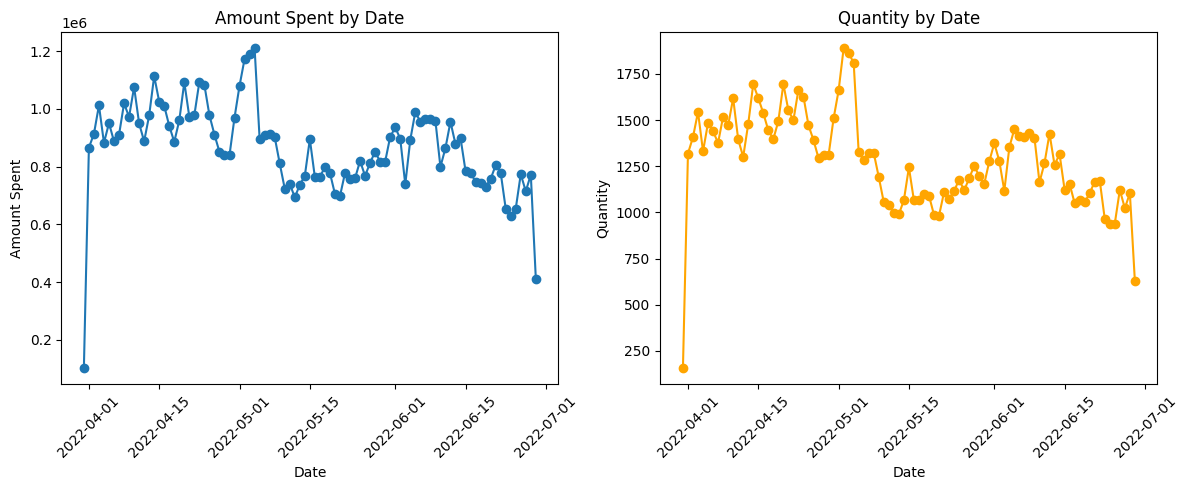

In [6]:
# Group by date and calculate total amount spent and quantity per date
daily_spending = sale_report.groupby('date')['amount'].sum()
daily_quantity = sale_report.groupby('date')['qty'].sum()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot 1: Amount spent by date
axes[0].plot(daily_spending.index, daily_spending.values, marker='o')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Amount Spent')
axes[0].set_title('Amount Spent by Date')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Quantity by date
axes[1].plot(daily_quantity.index, daily_quantity.values, marker='o', color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Quantity')
axes[1].set_title('Quantity by Date')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## **Note** : Le 1er mai c'est la journée du travail en Inde

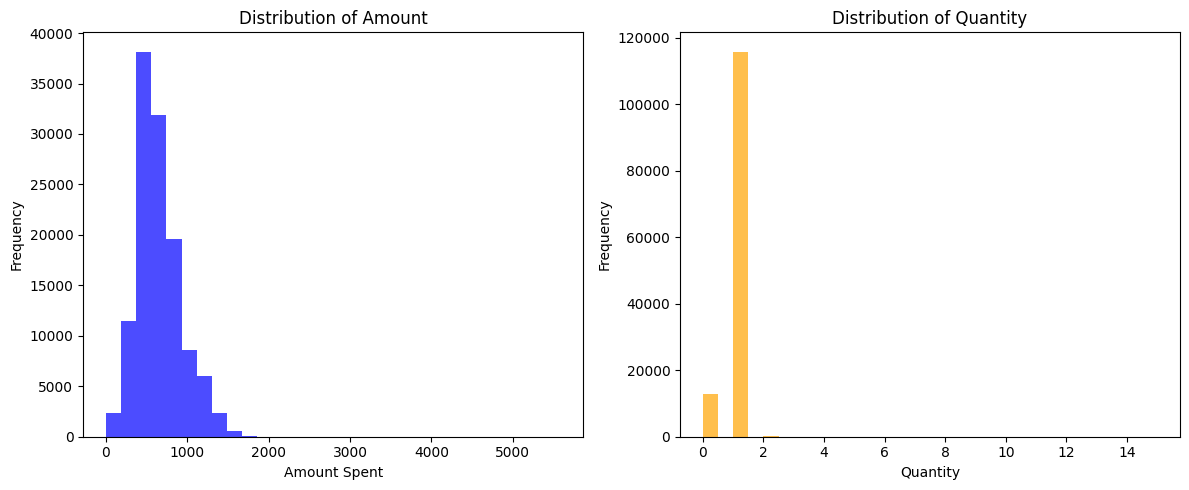

In [50]:
# Plot distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot 1
axes[0].hist(sale_report['amount'], bins=30, color='blue', alpha=0.7)
axes[0].set_xlabel('Amount Spent')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Amount')

# Plot 2
axes[1].hist(sale_report['qty'], bins=30, color='orange', alpha=0.7)
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Quantity')

plt.tight_layout()
plt.show()

In [51]:
# Describe
col_num = ['amount', 'qty']
sale_report[col_num].describe()

,amount,qty
count,121180.000000,128975.000000
mean,648.561465,0.904431
std,281.211687,0.313354
min,0.000000,0.000000
25%,449.000000,1.000000
50%,605.000000,1.000000
75%,788.000000,1.000000
max,5584.000000,15.000000


### Variables qualitatives
***

In [8]:
col_quali = ['status', 'fulfilment', 'sales_channel', 'ship_service_level', 'category', 'size', 'ship_city', 'ship_state', 'ship_country', 'promotion_ids', 'b2b' ]
sale_report[col_quali].head(5)

,status,fulfilment,sales_channel,ship_service_level,category,size,ship_city,ship_state,ship_country,promotion_ids,b2b
index,,,,,,,,,,,
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,MUMBAI,MAHARASHTRA,IN,NaN,False
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,BENGALURU,KARNATAKA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,NAVI MUMBAI,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,PUDUCHERRY,PUDUCHERRY,IN,NaN,False
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,CHENNAI,TAMIL NADU,IN,NaN,False


In [9]:
# Count the number of observations for each city
city_counts = sale_report['ship_city'].value_counts()
state_counts = sale_report['ship_state'].value_counts()

# Keep only the top 11 cities and combine the rest into 'Other'
top_cities = city_counts.head(20).index
top_states = state_counts.head(20).index

sale_report['ship_city_top'] = sale_report['ship_city'].apply(lambda x: x if x in top_cities else 'Other')
sale_report['ship_state_top'] = sale_report['ship_state'].apply(lambda x: x if x in top_states else 'Other')

# print(sale_report['ship_city_top'].value_counts())
print(sale_report['ship_state_top'].value_counts())

MAHARASHTRA       22260
KARNATAKA         17326
TAMIL NADU        11483
TELANGANA         11330
UTTAR PRADESH     10638
DELHI              6782
KERALA             6585
WEST BENGAL        5963
ANDHRA PRADESH     5430
Other              5251
Gujarat            4489
HARYANA            4415
RAJASTHAN          2650
MADHYA PRADESH     2529
ODISHA             2115
BIHAR              2086
PUNJAB             1869
ASSAM              1663
UTTARAKHAND        1553
JHARKHAND          1456
GOA                1102
Name: ship_state_top, dtype: int64


In [10]:
# Ajust variable for plot
sale_report['promo'] = np.where(sale_report['promotion_ids'].notna(), True, False)
sale_report['ship_country'] = sale_report['ship_country'].fillna('WO')

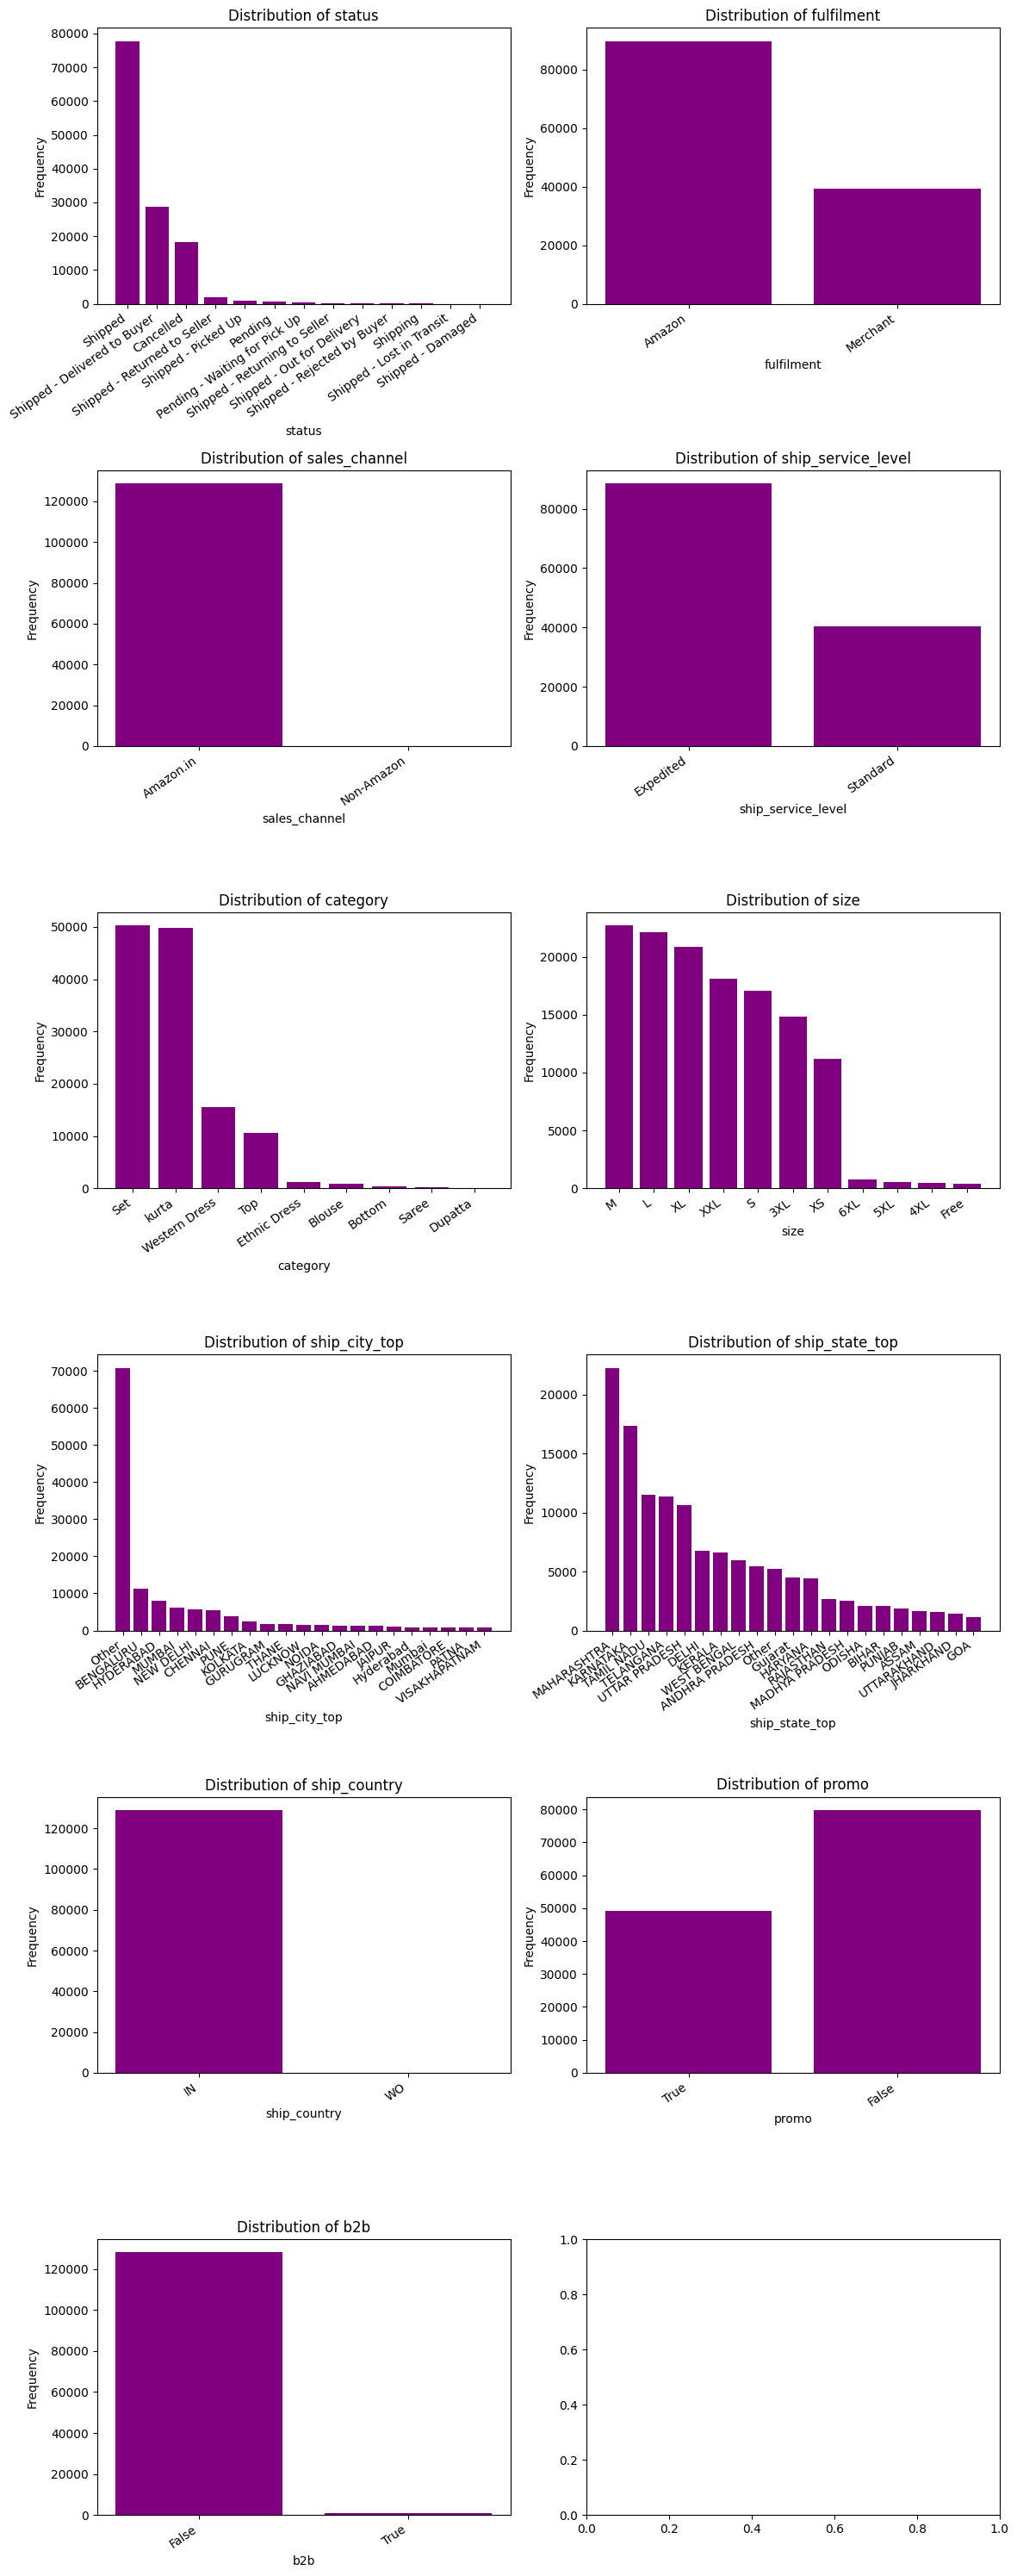

In [11]:
col_quali = ['status', 'fulfilment', 'sales_channel', 'ship_service_level', 'category', 'size', 'ship_city_top', 'ship_state_top', 'ship_country', 'promo', 'b2b' ]

# Calculate the number of rows and columns for subplots
num_plots = len(col_quali)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

# Flatten the axes array if there's only one row of subplots
if num_rows == 1:
    axes = [axes]

# Create bar plots for each categorical column
for i, column in enumerate(col_quali):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]

    counts = sale_report[column].value_counts()
    ax.bar(counts.index, counts.values, color='purple')
    
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {column}')
    ax.tick_params(axis='x', rotation=35)

    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index, rotation=35, ha='right')
    
plt.tight_layout()
plt.show()

***
### Variable d'intérêt après inspection visuel
***

In [16]:
sale_report.head(3)

,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,size,asin,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,ship_city_top,ship_state_top,promo
index,,,,,,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,MUMBAI,MAHARASHTRA,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,BENGALURU,KARNATAKA,True
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,NAVI MUMBAI,MAHARASHTRA,True


In [17]:
# Missing values
sale_report.isna().sum()

order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel             0
ship_service_level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier_status         6872
qty                       0
currency               7795
amount                 7795
ship_city                33
ship_state               33
ship_postal_code         33
ship_country              0
promotion_ids         49153
b2b                       0
fulfilled_by          89698
unnamed:_22           49050
ship_city_top             0
ship_state_top            0
promo                     0
dtype: int64

In [19]:
print(len(sale_report))
print(len(sale_report.loc[sale_report['amount'].isna()]))
print(len(sale_report.loc[sale_report['amount'] == 0]))

print('proportion = na :', len(sale_report.loc[sale_report['amount'].isna()])/len(sale_report)*100)
print('proportion = 0 :', len(sale_report.loc[sale_report['amount'] == 0])/len(sale_report)*100)

128975
7795
2343
proportion = na : 6.043806939329328
proportion = 0 : 1.816631130063966


La variable d'intérêt est le prix, on va donc éliminer les ligne dont 'Amount' est manquant

In [21]:
sale_report_na = sale_report.dropna(subset='amount')

In [121]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(sale_report_na['promo'], columns='Count')

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display test results
print(f"Chi-Square: {chi2}")
print(f"P-value: {p}")

Chi-Square: 0.0
P-value: 1.0


In [29]:
sale_report_na.to_hdf(path_df + 'sale_report_na.h5', key='s')

/tmp/ipykernel_12534/557586312.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->Index(['order_id', 'status', 'fulfilment', 'sales_channel',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'currency', 'ship_city', 'ship_state', 'ship_country',
       'promotion_ids', 'fulfilled_by', 'unnamed:_22', 'ship_city_top',
       'ship_state_top'],
      dtype='object')]

  sale_report_na.to_hdf(path_df + 'sale_report_na.h5', key='s')


*** 
# Feature engineering
***

### **Idées de Feature ** 
- grande ville ou non : ajouter des données sur la population des villes et ou régions
***

In [25]:
sale_report_na = pd.read_hdf(path_df + 'sale_report_na.h5', key='s')
sale_report_na.head(2)

,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,size,asin,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,ship_city_top,ship_state_top,promo
index,,,,,,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,MUMBAI,MAHARASHTRA,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,BENGALURU,KARNATAKA,True


In [26]:
# Day of the week
sale_report_na['dayofweek'] = sale_report_na['date'].dt.day_name()
sale_report_na.head(2)

,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,size,asin,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,ship_city_top,ship_state_top,promo,dayofweek
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,MUMBAI,MAHARASHTRA,False,Saturday
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,BENGALURU,KARNATAKA,True,Saturday


In [ ]:
# sale_report.loc[sale_report['promotion-ids'].duplicated() == True]
# sale_report.loc[sale_report['promotion-ids'] == '403-9615377-8133951']

duplicated_series = sale_report_na['promotion-ids'].duplicated(keep=False)
duplicated_values = sale_report_na[duplicated_series]
len(sale_report_na)
len(duplicated_values)

### Encoding categorical data
***

In [14]:
sale_report_na.head(3)

,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,size,asin,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22,ship_city_top,ship_state_top,promo,dayofweek
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,MUMBAI,MAHARASHTRA,False,Saturday
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,BENGALURU,KARNATAKA,True,Saturday
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,NAVI MUMBAI,MAHARASHTRA,True,Saturday


In [20]:
print(sale_report_na.columns.tolist())

['order_id', 'date', 'status', 'fulfilment', 'sales_channel', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'qty', 'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids', 'b2b', 'fulfilled_by', 'unnamed:_22', 'ship_city_top', 'ship_state_top', 'promo', 'dayofweek', 'encoded_size']


In [75]:
cols = ['date', 'amount', 'qty', 'fulfilment', 'ship_service_level', 'category', 'size', 'ship_state', 'promotion_ids', 'promo', 'dayofweek']
sale_report_clean = sale_report_na[cols]
sale_report_clean.head(3)

sale_report_clean.to_hdf(path_df + 'sale_report_clean.h5', key='s')

/tmp/ipykernel_15824/149016237.py:5: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['fulfilment', 'ship_service_level', 'category', 'size', 'ship_state',
       'promotion_ids', 'dayofweek'],
      dtype='object')]

  sale_report_clean.to_hdf(path_df + 'sale_report_clean.h5', key='s')


In [32]:
from sklearn.preprocessing import LabelEncoder

# Encoding binary data 
promo_column = sale_report_clean['promo']
sale_report_encoded = sale_report_clean.copy()
sale_report_encoded['promo_encoded'] = promo_column.astype(int)

# Encoding categorical data
columns_to_encode = ['fulfilment', 'ship_service_level', 'category', 'size', 'dayofweek']
encoded_columns = pd.get_dummies(sale_report_clean[columns_to_encode])
sale_report_encoded = pd.concat([sale_report_clean, encoded_columns], axis=1)

sale_report_encoded = sale_report_encoded.drop(columns={'date', 'fulfilment', 'ship_service_level', 'category', 'size', 'ship_state', 'promo', 'dayofweek'}) 
sale_report_encoded.head(2)

sale_report_encoded.to_hdf(path_df + 'sale_report_encoded.h5', key='s')

***
# **Customer Segmentation** with Clustering
***

In [16]:
import pandas as pd
from kmodes.kmodes import KModes

In [17]:
test_data = sale_report_encoded.loc[sale_report_encoded.index <= 10000]

In [18]:
k_modes = KModes(n_clusters=10, init='Huang', n_init=10, verbose=1)
clusters = k_modes.fit_predict(test_data)

test_data['cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2422, cost: 29455.0
Run 1, iteration: 2/100, moves: 275, cost: 29455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3004, cost: 28261.0
Run 2, iteration: 2/100, moves: 363, cost: 27993.0
Run 2, iteration: 3/100, moves: 2, cost: 27993.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3039, cost: 40580.0
Run 3, iteration: 2/100, moves: 507, cost: 40580.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2556, cost: 28311.0
Run 4, iteration: 2/100, moves: 425, cost: 28311.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2329, cost: 29359.0
Run 5, iteration: 2/100, moves: 183, cost: 29110.0
Run 5, iteration: 3/100, moves: 333,

/tmp/ipykernel_15824/3054034108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['cluster'] = clusters


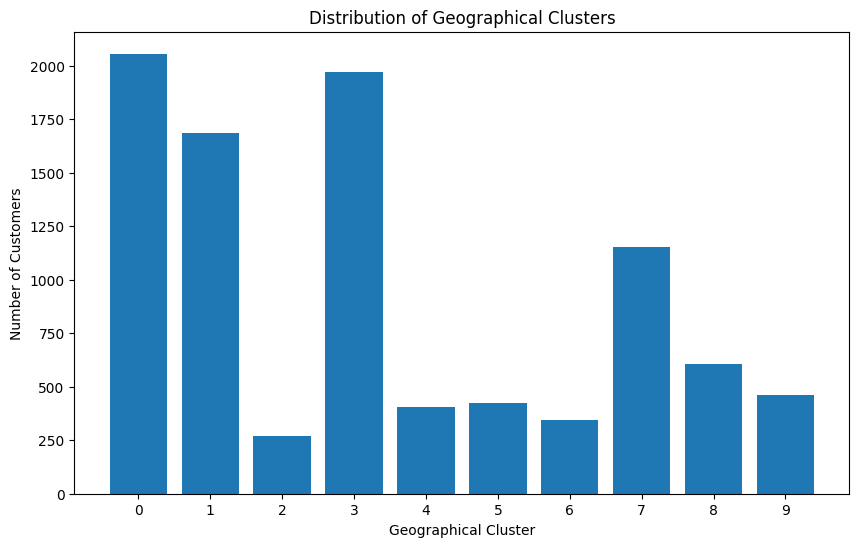

In [23]:
cluster_counts = test_data['cluster'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Geographical Cluster')
plt.ylabel('Number of Customers')
plt.title('Distribution of Geographical Clusters')
plt.xticks(cluster_counts.index)  # To ensure all cluster labels are displayed
plt.show()

In [49]:
print(test_data.columns.tolist())

['date', 'amount', 'qty', 'promo_encoded', 'fulfilment_Amazon', 'fulfilment_Merchant', 'ship_service_level_Expedited', 'ship_service_level_Standard', 'category_Blouse', 'category_Bottom', 'category_Dupatta', 'category_Ethnic Dress', 'category_Saree', 'category_Set', 'category_Top', 'category_Western Dress', 'category_kurta', 'size_3XL', 'size_4XL', 'size_5XL', 'size_6XL', 'size_Free', 'size_L', 'size_M', 'size_S', 'size_XL', 'size_XS', 'size_XXL', 'dayofweek_Friday', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday', 'cluster']


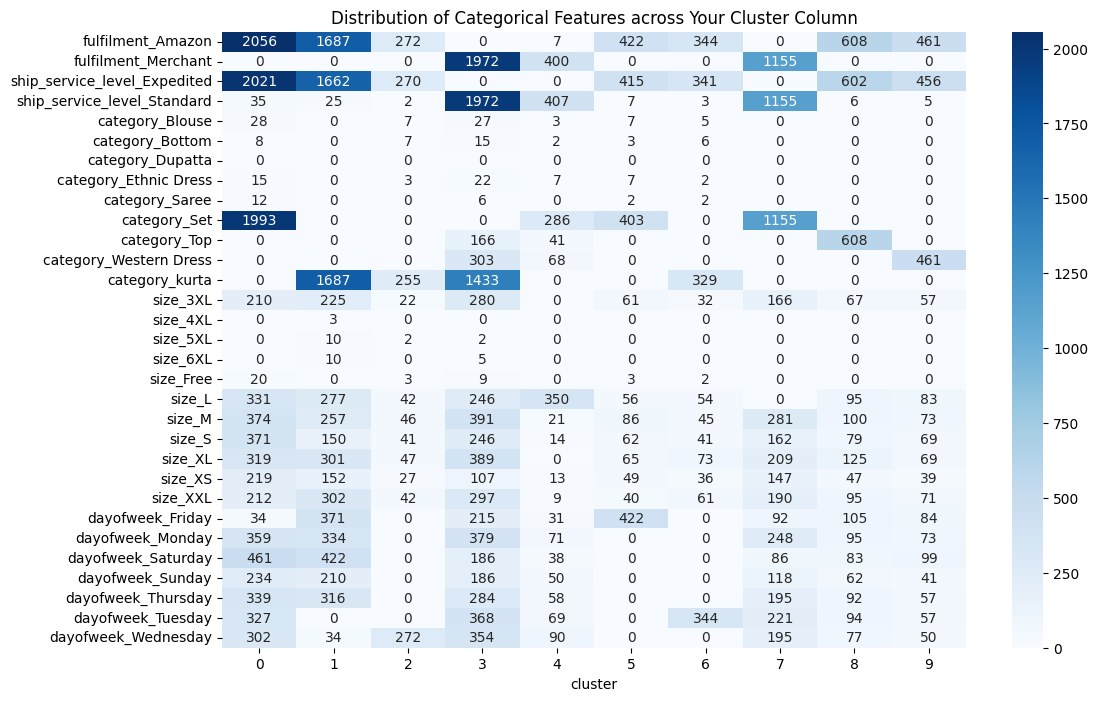

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data, replace this with your actual data
# test_data = your_actual_data_here

# Select columns for the heatmap
heatmap_columns = ['cluster', 'fulfilment_Amazon', 'fulfilment_Merchant', 'ship_service_level_Expedited', 
                   'ship_service_level_Standard', 'category_Blouse', 'category_Bottom', 'category_Dupatta', 
                   'category_Ethnic Dress', 'category_Saree', 'category_Set', 'category_Top', 'category_Western Dress', 
                   'category_kurta', 'size_3XL', 'size_4XL', 'size_5XL', 'size_6XL', 'size_Free', 'size_L', 'size_M', 
                   'size_S', 'size_XL', 'size_XS', 'size_XXL', 'dayofweek_Friday', 'dayofweek_Monday', 
                   'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday', 
                   'dayofweek_Wednesday']

# Assuming test_data is your dataset
heatmap_data = test_data[heatmap_columns]

# Group data and create the heatmap
heatmap_grouped = heatmap_data.groupby('cluster').sum().T  # Transpose the dataframe
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_grouped, cmap='Blues', annot=True, fmt='d')
plt.title('Distribution of Categorical Features across Your Cluster Column')
plt.show()


In [66]:
merged_data = test_data.merge(postal_code.iloc[:1000], left_index=True, right_index=True)
merged_data.head(2)

,date,amount,qty,promo_encoded,fulfilment_Amazon,fulfilment_Merchant,ship_service_level_Expedited,ship_service_level_Standard,category_Blouse,category_Bottom,category_Dupatta,category_Ethnic Dress,category_Saree,category_Set,category_Top,category_Western Dress,category_kurta,size_3XL,size_4XL,size_5XL,size_6XL,size_Free,size_L,size_M,size_S,size_XL,size_XS,size_XXL,dayofweek_Friday,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,cluster,ship_postal_code
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2022-04-30,647.62,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3,400081.0
1,2022-04-30,406.00,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,560085.0


In [82]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 5.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 4.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic


categorical_features = ['fulfilment_Amazon', 'fulfilment_Merchant', 'ship_service_level_Expedited', 
                       'ship_service_level_Standard', 'category_Blouse', 'category_Bottom', 'category_Dupatta', 
                       'category_Ethnic Dress', 'category_Saree', 'category_Set', 'category_Top', 
                       'category_Western Dress', 'category_kurta', 'size_3XL', 'size_4XL', 'size_5XL', 
                       'size_6XL', 'size_Free', 'size_L', 'size_M', 'size_S', 'size_XL', 'size_XS', 
                       'size_XXL', 'dayofweek_Friday', 'dayofweek_Monday', 'dayofweek_Saturday', 
                       'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday']

# Create a mosaic plot
mosaic(test_data, ['cluster', *categorical_features], title='Cluster vs Categorical Feature')


NameError: name 'test_data' is not defined

***
## Cluster 2
***

In [73]:
cluster2 = test_data.drop(columns={'date', 'cluster'})
cluster2.head(2)

,amount,qty,promo_encoded,fulfilment_Amazon,fulfilment_Merchant,ship_service_level_Expedited,ship_service_level_Standard,category_Blouse,category_Bottom,category_Dupatta,category_Ethnic Dress,category_Saree,category_Set,category_Top,category_Western Dress,category_kurta,size_3XL,size_4XL,size_5XL,size_6XL,size_Free,size_L,size_M,size_S,size_XL,size_XS,size_XXL,dayofweek_Friday,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,647.62,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,406.00,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [75]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder


# Choose the number of clusters for K-means
n_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(cluster2)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(cluster2, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

/home/charles/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5389346576902456


In [78]:
silhouette_avg

0.5389346576902456

***
# **Sales Prediction** unsing ML
***

In [5]:
sale_prediction = pd.read_hdf(path_df + 'sale_report_encoded.h5', key='s')
sale_prediction

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [57]:
# Scaling 
# Ensures that features with different scales do not dominate the learning process
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

amount_qty_data = sale_prediction[['amount', 'qty']]
scaled_amount_qty_data = scaler.fit_transform(amount_qty_data)
scaled_amount_qty_df = pd.DataFrame(scaled_amount_qty_data, columns=['scaled_amount', 'scaled_qty'])
scaled_amount_qty_df.index = sale_prediction.index

sale_report_scaled = pd.concat([sale_prediction, scaled_amount_qty_df], axis=1)
sale_report_scaled = sale_report_scaled.drop(columns=['qty'])
sale_report_scaled.head(2)

,amount,fulfilment_Amazon,fulfilment_Merchant,ship_service_level_Expedited,ship_service_level_Standard,category_Blouse,category_Bottom,category_Dupatta,category_Ethnic Dress,category_Saree,category_Set,category_Top,category_Western Dress,category_kurta,size_3XL,size_4XL,size_5XL,size_6XL,size_Free,size_L,size_M,size_S,size_XL,size_XS,size_XXL,dayofweek_Friday,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,scaled_amount,scaled_qty
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,647.62,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.115978,0.000
1,406.00,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.072708,0.125


In [72]:
# Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X = sale_prediction.drop(columns=['amount'])
y = sale_prediction['amount']

# Train with 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 44048.69
R-squared: 0.45


In [73]:
import numpy as np

# Calculate the correlation matrix between features and target variable
correlation_matrix = np.corrcoef(X_train, y_train, rowvar=False)

# Extract the correlations of each feature with the target variable
feature_correlations = correlation_matrix[:-1, -1]

# Create a DataFrame to display feature names and their correlations
correlation_df = pd.DataFrame({'Feature': X_train.columns, 'Correlation': feature_correlations})

# Sort the DataFrame by correlation magnitude
correlation_df = correlation_df.reindex(correlation_df['Correlation'].abs().sort_values(ascending=False).index)

# Display the correlation results
print(correlation_df)


                         Feature  Correlation
13                category_kurta    -0.542952
10                  category_Set     0.523600
12        category_Western Dress     0.151210
11                  category_Top    -0.132049
0                            qty     0.069780
6                category_Bottom    -0.059975
17                      size_6XL     0.046284
3   ship_service_level_Expedited     0.040809
4    ship_service_level_Standard    -0.040809
5                category_Blouse    -0.039068
16                      size_5XL     0.039054
23                       size_XS     0.036594
24                      size_XXL    -0.036538
15                      size_4XL     0.035948
8          category_Ethnic Dress     0.026872
22                       size_XL    -0.025322
21                        size_S     0.022056
9                 category_Saree     0.018457
19                        size_L    -0.018293
18                     size_Free    -0.014002
20                        size_M  

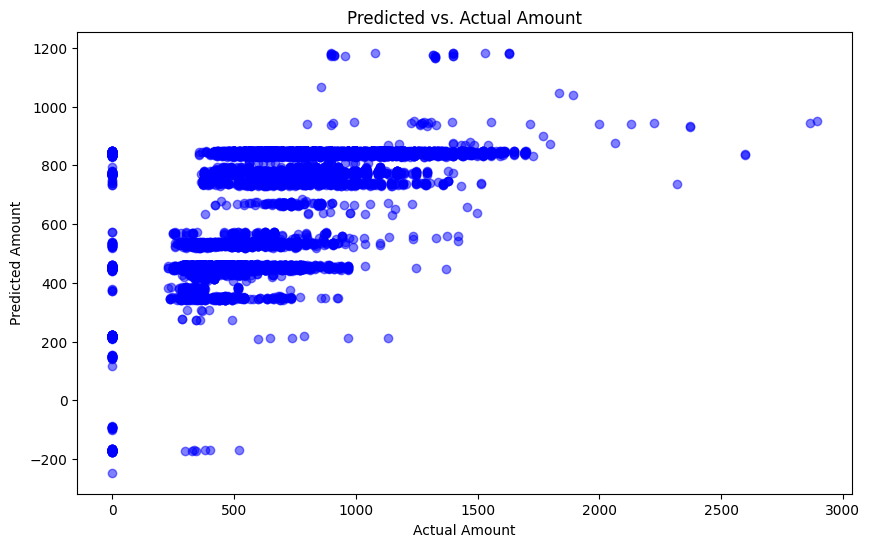

In [65]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Predicted vs. Actual Amount')
plt.show()

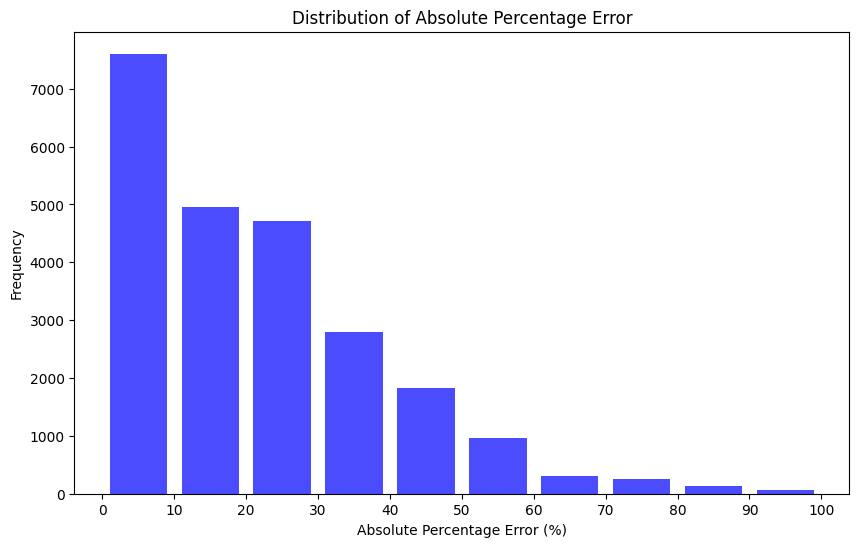

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate absolute percentage error for each prediction
absolute_percentage_error = np.abs((y_pred - y_test) / y_test) * 100

# Define bins for different percentage error ranges
bins = np.arange(0, 101, 10)  # Bins from 0% to 100% in increments of 10%

# Calculate the frequency of data points within each bin
hist, _ = np.histogram(absolute_percentage_error, bins=bins)

# Calculate the midpoints of each bin
bin_midpoints = (bins[:-1] + bins[1:]) / 2

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(bin_midpoints, hist, width=8, align='center', color='blue', alpha=0.7)
plt.xlabel('Absolute Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Percentage Error')
plt.xticks(bins)
plt.show()


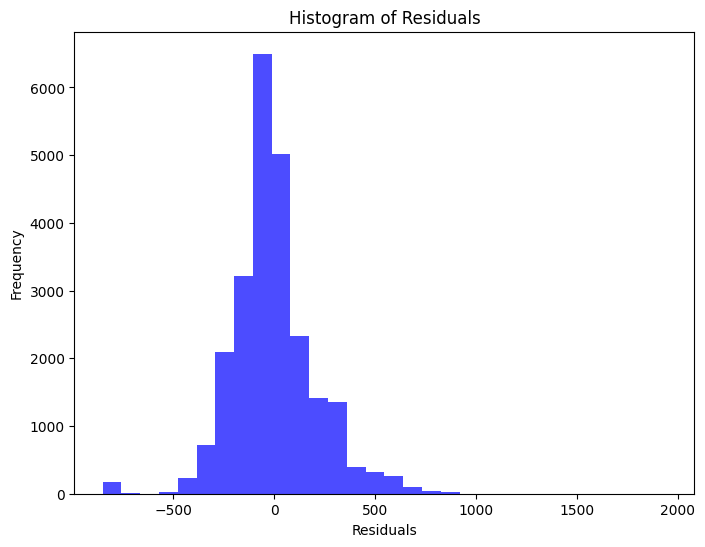

In [66]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

***
# Impact of promotion
***

In [7]:
promo = pd.read_hdf(path_df + 'sale_report_clean.h5', key='s')
promo

,date,amount,qty,fulfilment,ship_service_level,category,size,ship_state,promotion_ids,promo,dayofweek
index,,,,,,,,,,,
0,2022-04-30,647.62,0,Merchant,Standard,Set,S,MAHARASHTRA,NaN,False,Saturday
1,2022-04-30,406.00,1,Merchant,Standard,kurta,3XL,KARNATAKA,Amazon PLCC Free-Financing Universal Merchant ...,True,Saturday
2,2022-04-30,329.00,1,Amazon,Expedited,kurta,XL,MAHARASHTRA,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Saturday
3,2022-04-30,753.33,0,Merchant,Standard,Western Dress,L,PUDUCHERRY,NaN,False,Saturday
4,2022-04-30,574.00,1,Amazon,Expedited,Top,3XL,TAMIL NADU,NaN,False,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,517.00,1,Amazon,Expedited,kurta,XL,TELANGANA,NaN,False,Tuesday
128971,2022-05-31,999.00,1,Amazon,Expedited,Set,M,HARYANA,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Tuesday
128972,2022-05-31,690.00,1,Amazon,Expedited,Western Dress,XXL,TELANGANA,NaN,False,Tuesday


In [77]:
promo['promotion_ids'].unique()

array([nan,
       'Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Fin

In [8]:
promo['promo_type'] = promo['promotion_ids']
promo['promo_type'] = np.where(promo['promo_type'].str.contains('Amazon PLCC Free-Financing'), 'PLCC_Free_Financing', promo['promotion_ids'])
promo['promo_type'] = np.where(promo['promo_type'].str.contains('IN Core Free Shipping'), 'Free_Shipping', promo['promo_type'])
promo['promo_type'] = np.where(promo['promo_type'].str.contains('Duplicated'), 'Coupon', promo['promo_type'])
promo['promo_type'] = np.where(promo['promo_type'].str.contains('Coupon'), 'Coupon', promo['promo_type'])
promo['promo_type'] = np.where(promo['promo'] == False, 'No_Promo', promo['promo_type'])
promo

,date,amount,qty,fulfilment,ship_service_level,category,size,ship_state,promotion_ids,promo,dayofweek,promo_type
index,,,,,,,,,,,,
0,2022-04-30,647.62,0,Merchant,Standard,Set,S,MAHARASHTRA,NaN,False,Saturday,No_Promo
1,2022-04-30,406.00,1,Merchant,Standard,kurta,3XL,KARNATAKA,Amazon PLCC Free-Financing Universal Merchant ...,True,Saturday,PLCC_Free_Financing
2,2022-04-30,329.00,1,Amazon,Expedited,kurta,XL,MAHARASHTRA,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Saturday,Free_Shipping
3,2022-04-30,753.33,0,Merchant,Standard,Western Dress,L,PUDUCHERRY,NaN,False,Saturday,No_Promo
4,2022-04-30,574.00,1,Amazon,Expedited,Top,3XL,TAMIL NADU,NaN,False,Saturday,No_Promo
...,...,...,...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,517.00,1,Amazon,Expedited,kurta,XL,TELANGANA,NaN,False,Tuesday,No_Promo
128971,2022-05-31,999.00,1,Amazon,Expedited,Set,M,HARYANA,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Tuesday,Free_Shipping
128972,2022-05-31,690.00,1,Amazon,Expedited,Western Dress,XXL,TELANGANA,NaN,False,Tuesday,No_Promo


In [104]:
promo['promo_type'].unique()

array(['No_Promo', 'PLCC_Free_Financing', 'Free_Shipping', 'Coupon'],
      dtype=object)

In [112]:
promo['promo'].value_counts()

True     79482
False    41698
Name: promo, dtype: int64

In [110]:
promo_counts

Free_Shipping          45859
No_Promo               41698
PLCC_Free_Financing    32348
Coupon                  1275
Name: promo_type, dtype: int64

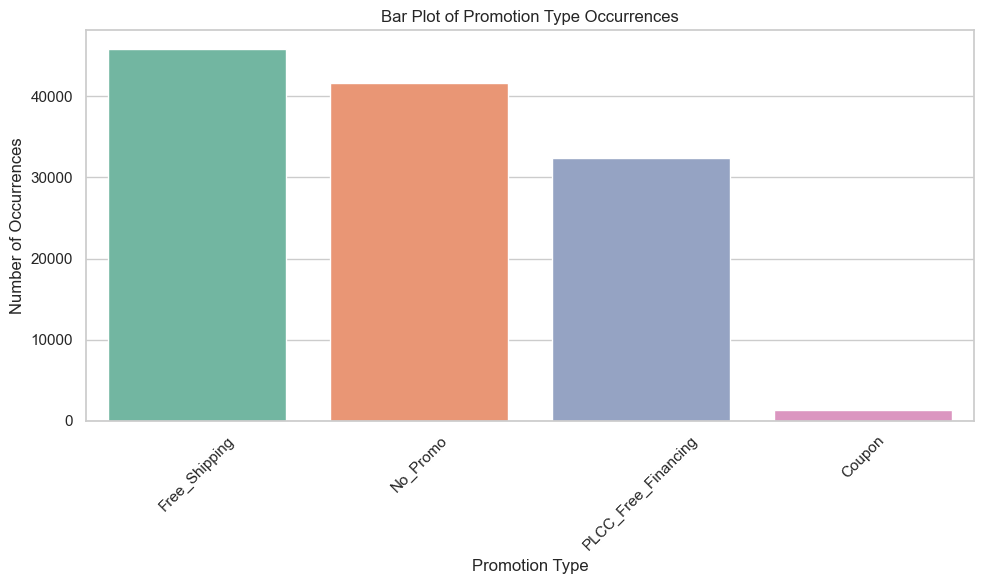

In [109]:
promo_counts = promo['promo_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=promo_counts.index, y=promo_counts.values, palette="Set2")
plt.xticks(rotation=45)
plt.xlabel('Promotion Type')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot of Promotion Type Occurrences')
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

promo_reg = promo
# Encoding binary data 
promo_column = promo_reg['promo']
promo_reg['promo_encoded'] = promo_column.astype(int)

# Encoding categorical data
columns_to_encode = ['dayofweek', 'promo_type', 'fulfilment', 'ship_service_level', 'category', 'size']
encoded_columns = pd.get_dummies(promo_reg[columns_to_encode])
promo_encoded = pd.concat([promo_reg, encoded_columns], axis=1)

promo_encoded = promo_encoded.drop(columns={'date', 'qty', 'fulfilment', 'ship_service_level', 'category', 'size', 'ship_state', 'promotion_ids', 'promo', 'promo_type', 'dayofweek'}) 
promo_encoded.head(2)

,amount,promo_encoded,dayofweek_Friday,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,promo_type_Coupon,promo_type_Free_Shipping,promo_type_No_Promo,promo_type_PLCC_Free_Financing,fulfilment_Amazon,fulfilment_Merchant,ship_service_level_Expedited,ship_service_level_Standard,category_Blouse,category_Bottom,category_Dupatta,category_Ethnic Dress,category_Saree,category_Set,category_Top,category_Western Dress,category_kurta,size_3XL,size_4XL,size_5XL,size_6XL,size_Free,size_L,size_M,size_S,size_XL,size_XS,size_XXL
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,647.62,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,406.00,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [11]:
print(promo_encoded.columns.tolist())


['amount', 'promo_encoded', 'dayofweek_Friday', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday', 'promo_type_Coupon', 'promo_type_Free_Shipping', 'promo_type_No_Promo', 'promo_type_PLCC_Free_Financing', 'fulfilment_Amazon', 'fulfilment_Merchant', 'ship_service_level_Expedited', 'ship_service_level_Standard', 'category_Blouse', 'category_Bottom', 'category_Dupatta', 'category_Ethnic Dress', 'category_Saree', 'category_Set', 'category_Top', 'category_Western Dress', 'category_kurta', 'size_3XL', 'size_4XL', 'size_5XL', 'size_6XL', 'size_Free', 'size_L', 'size_M', 'size_S', 'size_XL', 'size_XS', 'size_XXL']


In [12]:
# Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X = promo_encoded.drop(columns='amount')
y = promo_encoded['amount']

# Train with 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 44111.03
R-squared: 0.45


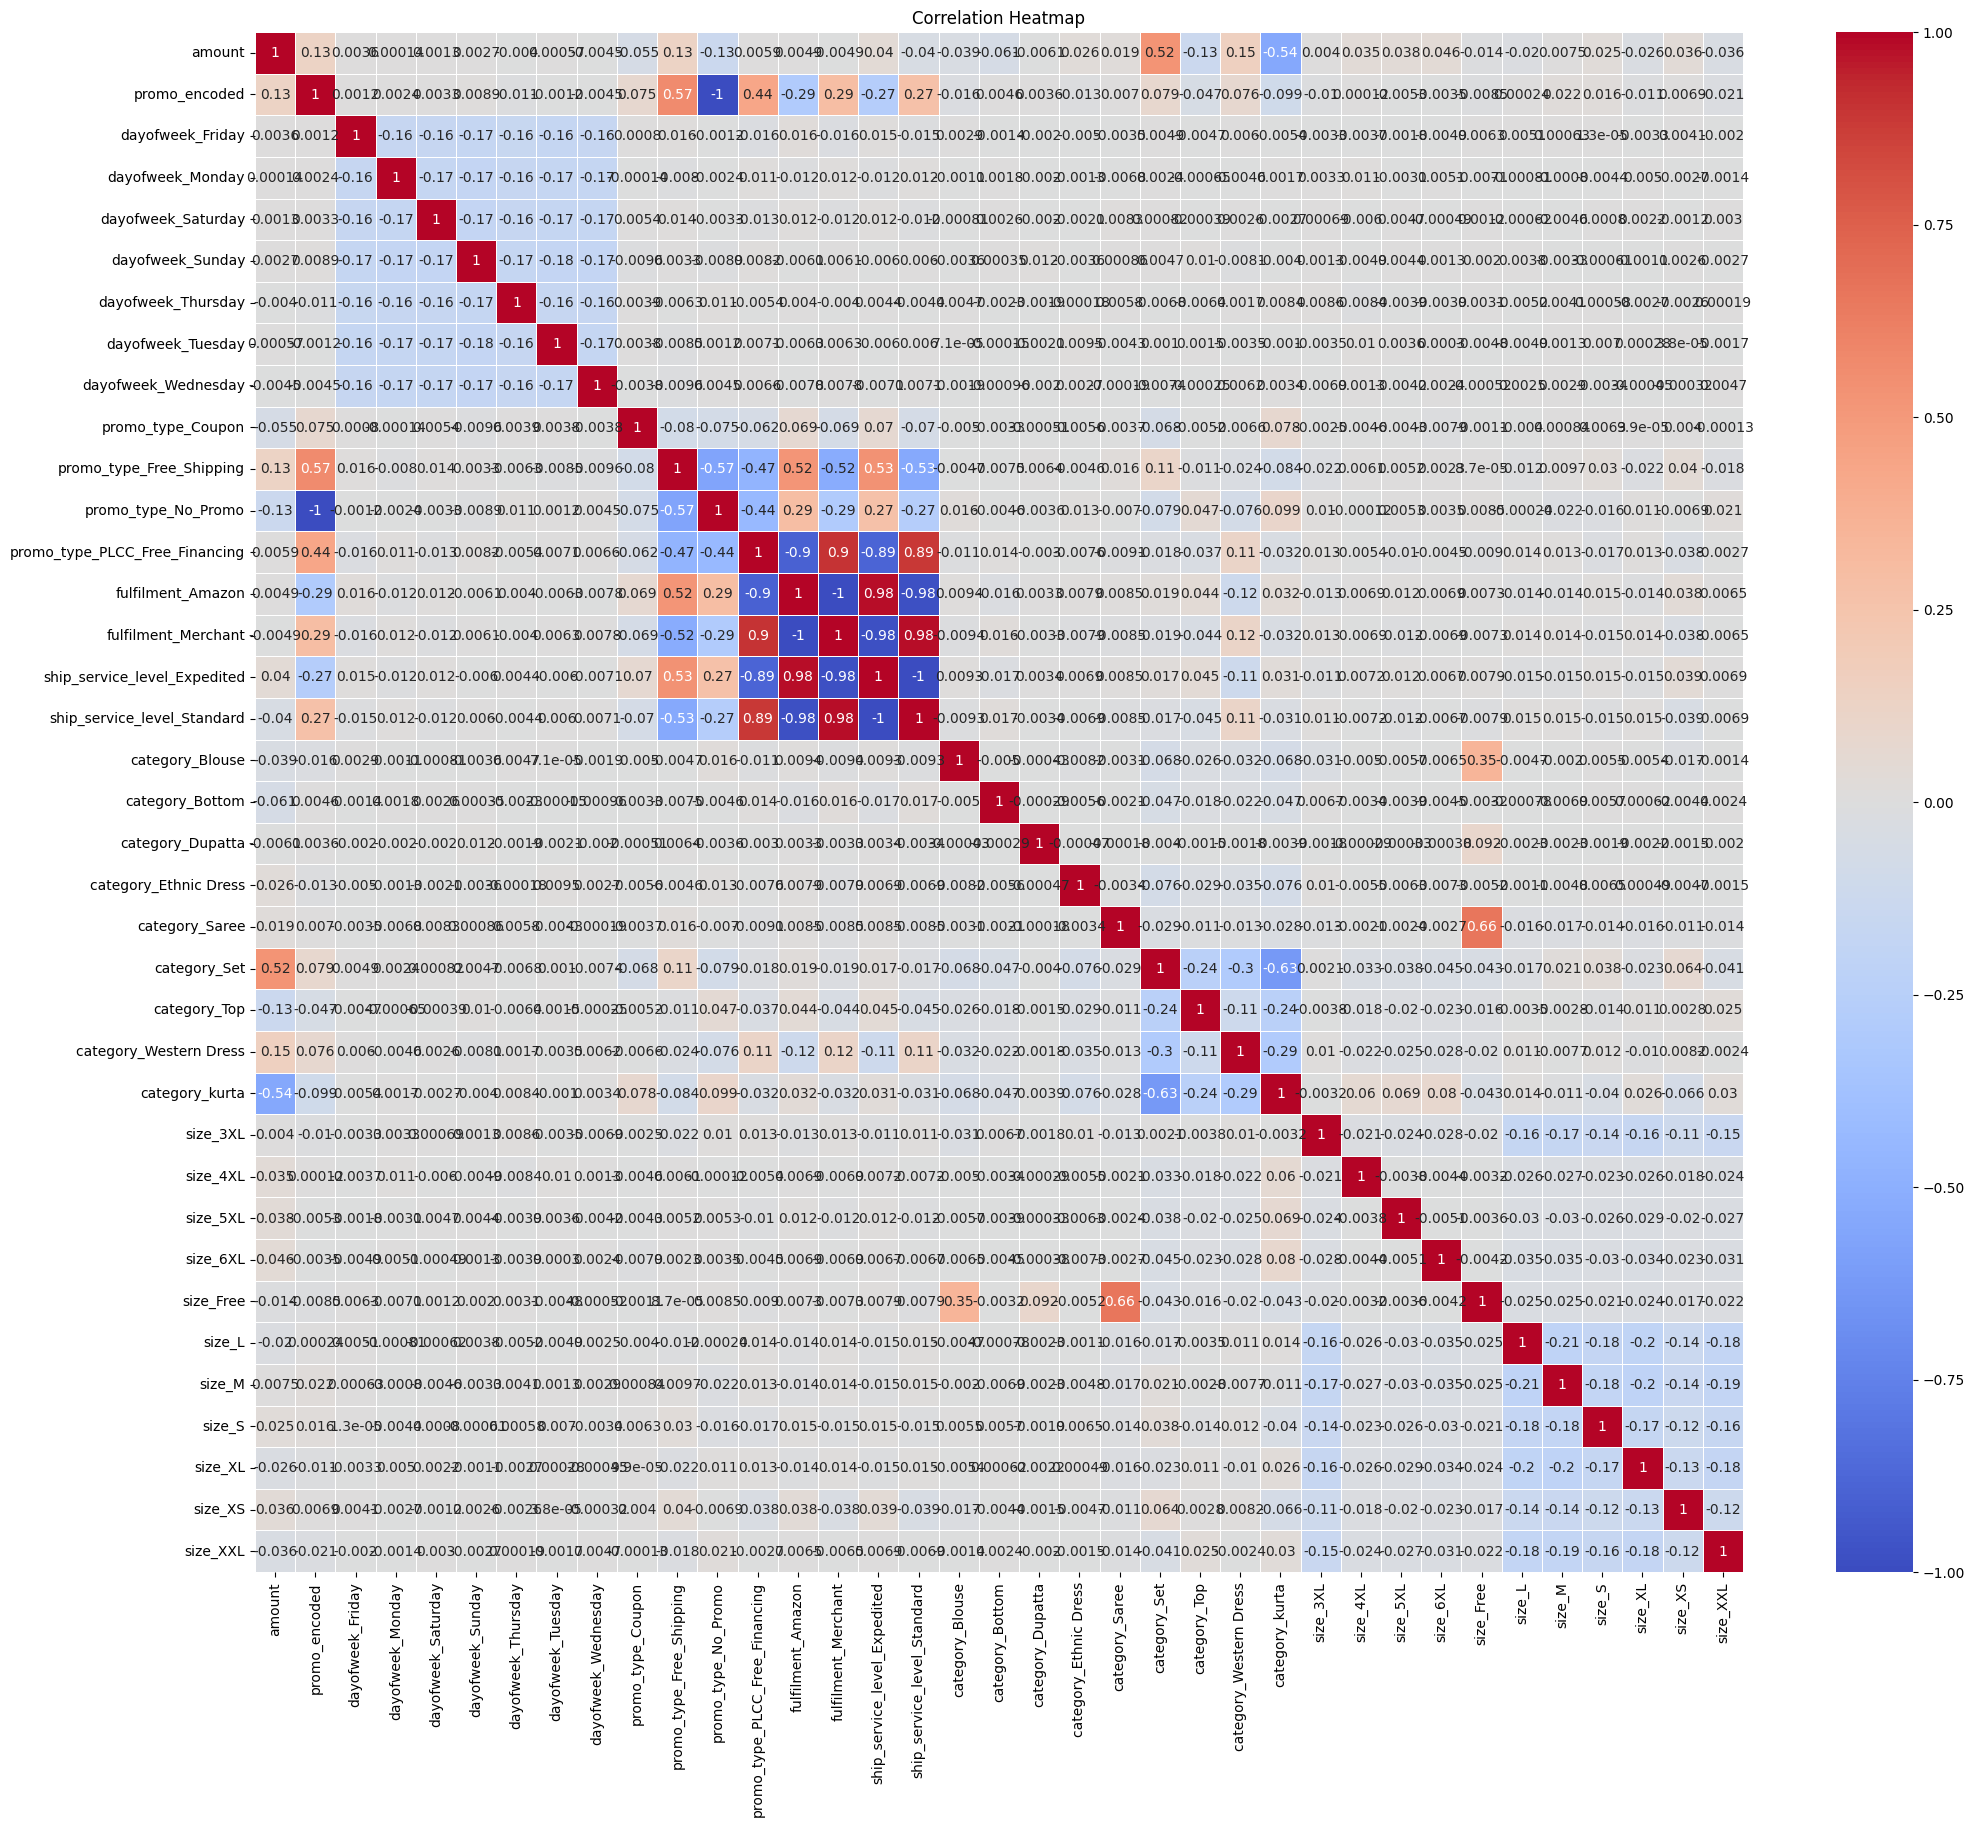

In [15]:
import pandas as pd

correlation_matrix = promo_encoded.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = promo_encoded.drop(columns='amount')
y = promo_encoded['amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 44053.78
R-squared: 0.45


In [47]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already encoded categorical features and 'amount' is the target column
X = promo_encoded.drop(columns='amount')
y = promo_encoded['amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train CatBoost Regressor
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', random_seed=42)
model.fit(X_train, y_train, cat_features=[list(X.columns).index(cat_col) for cat_col in X.select_dtypes(include=['category']).columns])

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


0:	learn: 269.4667092	total: 14.2ms	remaining: 14.1s
1:	learn: 260.2943757	total: 25.8ms	remaining: 12.9s
2:	learn: 252.0359009	total: 38.4ms	remaining: 12.8s
3:	learn: 245.4383171	total: 49.9ms	remaining: 12.4s
4:	learn: 239.9119675	total: 62.4ms	remaining: 12.4s
5:	learn: 235.3378927	total: 74.3ms	remaining: 12.3s
6:	learn: 231.3497474	total: 85.9ms	remaining: 12.2s
7:	learn: 228.1679688	total: 98.5ms	remaining: 12.2s
8:	learn: 224.8569295	total: 112ms	remaining: 12.3s
9:	learn: 222.5614162	total: 123ms	remaining: 12.2s
10:	learn: 220.7035625	total: 133ms	remaining: 12s
11:	learn: 218.6420599	total: 145ms	remaining: 11.9s
12:	learn: 216.9538623	total: 156ms	remaining: 11.9s
13:	learn: 215.5820062	total: 170ms	remaining: 11.9s
14:	learn: 214.4569814	total: 183ms	remaining: 12s
15:	learn: 213.6320050	total: 193ms	remaining: 11.9s
16:	learn: 212.9577763	total: 206ms	remaining: 11.9s
17:	learn: 212.4582311	total: 220ms	remaining: 12s
18:	learn: 212.0170654	total: 235ms	remaining: 12.1s
1

In [51]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already encoded categorical features and 'amount' is the target column
X = promo_encoded.drop(columns='amount')
y = promo_encoded['amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train CatBoost Regressor
model = CatBoostRegressor(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    random_seed=42,
    cat_features=[list(X.columns).index(cat_col) for cat_col in X.select_dtypes(include=['category']).columns]
)

model.fit(X_train, y_train)

# Save the trained model
model.save_model(path_df + 'trained_catboost_model.cbm')

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


0:	learn: 269.9534487	total: 16ms	remaining: 16s
1:	learn: 260.1167670	total: 27.1ms	remaining: 13.5s
2:	learn: 252.2768171	total: 37.9ms	remaining: 12.6s
3:	learn: 245.6234399	total: 46.5ms	remaining: 11.6s
4:	learn: 240.1095496	total: 56.5ms	remaining: 11.2s
5:	learn: 235.0695951	total: 67.6ms	remaining: 11.2s
6:	learn: 231.2507521	total: 76ms	remaining: 10.8s
7:	learn: 227.2998521	total: 88.8ms	remaining: 11s
8:	learn: 224.6138665	total: 99.2ms	remaining: 10.9s
9:	learn: 221.8697735	total: 108ms	remaining: 10.7s
10:	learn: 219.5307303	total: 121ms	remaining: 10.9s
11:	learn: 217.8784034	total: 131ms	remaining: 10.8s
12:	learn: 216.5941939	total: 143ms	remaining: 10.8s
13:	learn: 215.1916628	total: 155ms	remaining: 10.9s
14:	learn: 214.2408409	total: 166ms	remaining: 10.9s
15:	learn: 213.2781285	total: 174ms	remaining: 10.7s
16:	learn: 212.6210265	total: 183ms	remaining: 10.6s
17:	learn: 212.0583985	total: 193ms	remaining: 10.5s
18:	learn: 211.5910145	total: 202ms	remaining: 10.4s
19

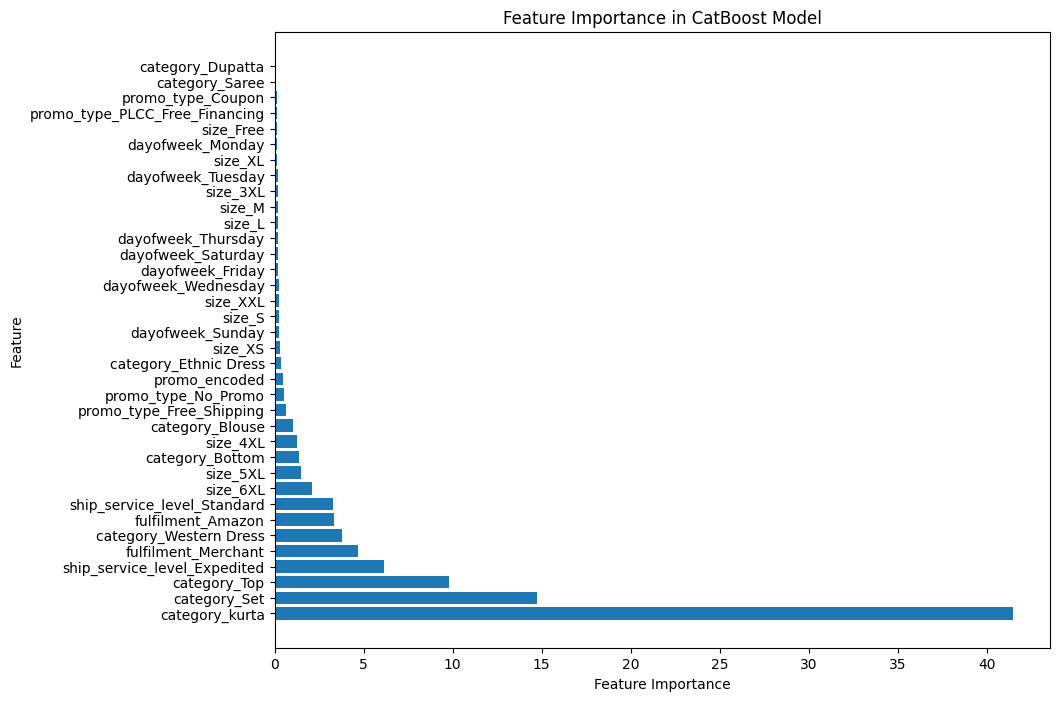

In [52]:
import matplotlib.pyplot as plt

# Get feature importance scores
feature_importance = model.get_feature_importance(type="FeatureImportance")

# Get feature names
feature_names = X.columns

# Create a sorted list of feature names and corresponding importance scores
sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importance scores
sorted_feature_names = [feature for feature, _ in sorted_features]
sorted_importance_scores = [score for _, score in sorted_features]

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in CatBoost Model')
plt.show()

# Scale = 1 to 100

In [57]:
top_categorical_features = ['category_kurta', 'category_Set', 'category_Top']

for feature in top_categorical_features:
    importance = feature_importance[X_train.columns.get_loc(feature)]
    print(f"{feature}: Importance = {importance:.2f}")

category_kurta: Importance = 41.44
category_Set: Importance = 14.75
category_Top: Importance = 9.80


In [61]:
from pdpbox import pdp, get_dataset, info_plots

# Create a dataset for pdpbox
pdp_dataset = get_dataset(X=X_train, y=y_train)

# Specify features for partial dependence plots
features_to_plot = ['kurta', 'set', 'top']

# Create partial dependence plots
pdp_plots = pdp.pdp_multi(pdp_dataset, model=model, features=features_to_plot)

# Display the partial dependence plots
pdp.pdp_interact_plot(pdp_plots, features=features_to_plot, plot_type='grid')


ImportError: cannot import name 'get_dataset' from 'pdpbox' (/home/charles/.local/lib/python3.10/site-packages/pdpbox/__init__.py)